# OPTaaS Multi-Objective

### <span style="color:red">Note:</span> To run this notebook, you need an API Key. You can get one <a href="mailto:charles.brecque@mindfoundry.ai">here</a>.

OPTaaS can optimize multiple objectives within a single Task. Your scoring function should return a named list of scores for each objective.

Please note: `ChoiceParameters` and any parameter with `optional=TRUE` are not currently supported for multi-objective tasks.

## Define your parameters and objectives
We will use [this multi-objective optimization example](https://sop.tik.ee.ethz.ch/download/supplementary/testproblems/dtlz2/index.php#Formulation):

In [1]:
library(optaas.client)

parameters <- list(
    FloatParameter('x1', minimum=0, maximum=1),
    FloatParameter('x2', minimum=0, maximum=1)
)

objectives <- list(
    Objective(id="f1", goal="max"),  # or goal="min" as appropriate
    Objective(id="f2", goal="max")   # you can also specify min_known_score and max_known_score
)

scoring_function <- function(x1, x2) {
    g <- ((x1 - 0.5) ** 2) + ((x2 - 0.5) ** 2)
    x1_pi2 <- x1 * pi / 2
    f1 = (1 + g) * cos(x1_pi2)
    f2 = (1 + g) * sin(x1_pi2)
    list(f1=f1, f2=f2)
}

## Connect to OPTaaS using your API Key

In [2]:
client <- OPTaaSClient$new("https://optaas.mindfoundry.ai", "Your OPTaaS API Key")

## Create your Task

In [3]:
task <- client$create_task(
    title="Multi-objective Example",
    parameters=parameters,
    objectives=objectives,
    initial_configurations=4
)

## Run your Task
At the end we will retrieve the set of Pareto front Results. These are the Results where, for each objective, the score cannot be improved without reducing the score for another objective.

In [4]:
pareto_set <- task$run(scoring_function=scoring_function, number_of_iterations=20)

[1] "Iteration: 1   Score: f1=0.707106781186548, f2=0.707106781186547"
[1] "Iteration: 2   Score: f1=1.0393644740752, f2=0.430518861410726"
[1] "Iteration: 3   Score: f1=0.430518861410726, f2=1.0393644740752"
[1] "Iteration: 4   Score: f1=0.857453037687, f2=0.572931802801465"
[1] "Iteration: 5   Score: f1=4.71238886255462e-08, f2=1.49999996"
[1] "Iteration: 6   Score: f1=1.5, f2=0"
[1] "Iteration: 7   Score: f1=4.71238892538648e-08, f2=1.49999998"
[1] "Iteration: 8   Score: f1=1.49999998, f2=0"
[1] "Iteration: 9   Score: f1=0.749764108075161, f2=1.01115489688827"
[1] "Iteration: 10   Score: f1=1.29501004722847, f2=0"
[1] "Iteration: 11   Score: f1=1.26100661932729, f2=0.433841420194317"
[1] "Iteration: 12   Score: f1=1.02569520934397, f2=0.733497937723559"
[1] "Iteration: 13   Score: f1=0.612021192334396, f2=1.12843337184701"
[1] "Iteration: 14   Score: f1=0.924152745465075, f2=0.842958158006802"
[1] "Iteration: 15   Score: f1=1.34931704106371, f2=0.296037004233001"
[1] "Iteration: 16 

## Plot the Pareto front
Points in blue represent all the evaluated Results. The red line represents the Pareto front.

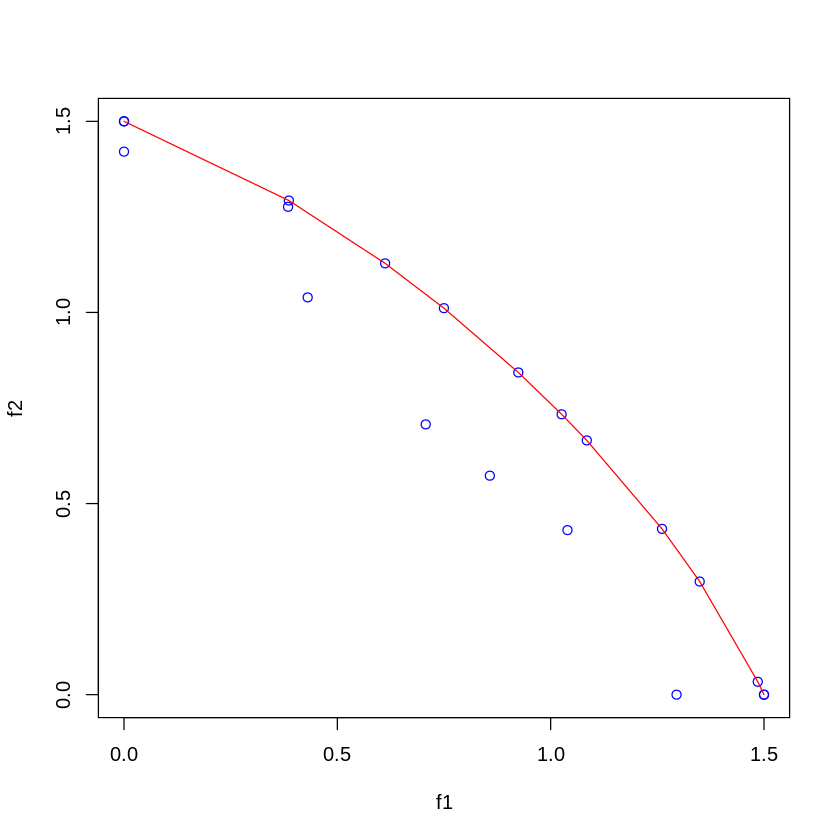

In [5]:
all_results <- task$get_results()
f1 <- lapply(all_results, function(result) {result$score$f1})
f2 <- lapply(all_results, function(result) {result$score$f2})
plot(f1, f2, col="blue")

ordered_pareto_set <- pareto_set[order(sapply(pareto_set, function(result) {result$score$f1}))]
pareto_f1 <- lapply(ordered_pareto_set, function(result) {result$score$f1})
pareto_f2 <- lapply(ordered_pareto_set, function(result) {result$score$f2})
lines(pareto_f1, pareto_f2, col="red")